In [ ]:
Collect beta angle information from CSV

In [1]:
import pandas as pd
solar_angle_data = pd.read_csv("Halfhour_Ukpik-1_Beta_Angle_AprMay2022.csv")
beta_angles = solar_angle_data['Beta Angle (deg)']
dates = solar_angle_data['Time (UTCG)']
dates

0       2022-04-01 12:00:00 AM
1       2022-04-01 12:30:00 AM
2        2022-04-01 1:00:00 AM
3        2022-04-01 1:30:00 AM
4        2022-04-01 2:00:00 AM
                 ...          
1436    2022-04-30 10:00:00 PM
1437    2022-04-30 10:30:00 PM
1438    2022-04-30 11:00:00 PM
1439    2022-04-30 11:30:00 PM
1440    2022-05-01 12:00:00 AM
Name: Time (UTCG), Length: 1441, dtype: object

In [ ]:
Every 90-minute orbit, 30 minutes of eclipse. Beta angles change by the half-hour, 
based on format of data, can assume every 3 samples correspond to single orbit.
Analysis therefore done over n/3 orbits, where n defined by number of beta-angle recordings from STK sim

In [2]:
import math
import matplotlib.pyplot as plt
solar_irradiance = 1380
area = 0.003
efficiency = 0.24
solar_power = []
total_solar_power = 0

samples = len(beta_angles)
orbits = samples/3

iterator = []
iterator_orbits = []
orbit_angles = []

for i in range(samples):
    
    if i % 3 == 0:  #For every third data-sample, satellite enters eclipse thus zero power generated
        solar_power.append(0)
        iterator_orbits.append(i/3)
        orbit_angles.append(beta_angles[i])
        
    #For nominal operation, power is generated
    else:
        
        #Convert to mWh and quadruple as four cells per panel 
        #Take beta-angle at iteration & factor into power gen eqn
        #Angles in data never exceed range: [-90, 90], no need to account for out-of-range case  
        solar_power.append(solar_irradiance * area * efficiency * math.cos(beta_angles[i]*math.pi/180) * 4 * 1000)
        
        #In case of negative beta angles, satellite should generate power
        if(solar_power[i] < 0):
            solar_power[i] = solar_power[i] * (-1) #despite negative-angles, solar panels never lose energy, reflected in code
    
    iterator.append(i)

In [ ]:
Visualize how beta angles change over orbital period as they directly affect power generation from solar panels

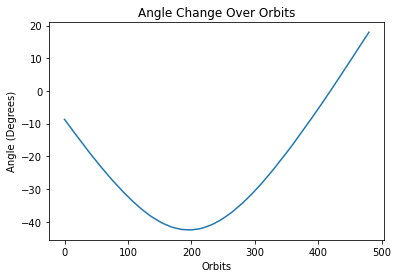

In [3]:
plt.title("Angle Change Over Orbits")
plt.xlabel("Orbits")
plt.ylabel("Angle (Degrees)")
plt.plot(iterator_orbits, orbit_angles)

In [ ]:
Given power analysis per orbit for solar panels is done, now require analysis per orbit considering other components such as
magnetorquers, gyro, obc, transceiver. 

In [ ]:
Magnetorquers, gyro and obc are always on; constant per every orbit

In [4]:
magnetorquer = -600
gyro = -12
obc = -800
power_used_platform_computing = (gyro + magnetorquer + obc) / 60 * 90 #all comp will use power for entire duration of 90-min orbit
print("OBC, ADCS per orbit: " + str(power_used_platform_computing))

OBC, ADCS per orbit: -2118.0


In [ ]:
Transceiver will transmit a certain time per each orbit, rest of time it will be receiving
Below analysis assumes single transmission per orbit, with following average time for transmission

In [5]:
transmission_data = pd.read_csv("Satellite-ISS_UNITY_25575-To-Facility-London_April22_Access.csv")
mean_transmit_time = transmission_data['Duration (sec)'].mean()/60/60
print('Average transmission time (mins): April - May 2022: ' + str(mean_transmit_time) + " hours") 

Average transmission time (mins): April - May 2022: 0.09202910202991453 hours


In [6]:
uhf_transceiver_transmit = 1140
uhf_transceiver_receive = 0.0825

power_used_transceiver = uhf_transceiver_transmit/60*mean_transmit_time*(-1) + uhf_transceiver_receive/60*(90-mean_transmit_time)*(-1)
print("Transceiver per orbit: " + str(power_used_transceiver))

Transceiver per orbit: -1.8721763985530848


In [ ]:
Visualize power generation over a few orbits to see structure per orbit

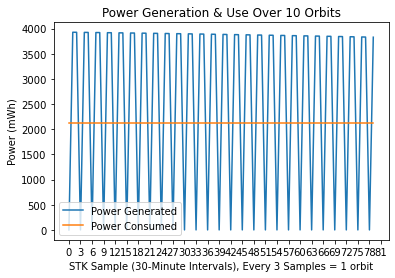

In [8]:
solar_power_sample = []
iterator_sample = []
all_comp = power_used_transceiver + power_used_platform_computing * (-1)
all_comp_data_sample = []

for i in range(80):
    solar_power_sample.append(solar_power[i])
    iterator_sample.append(i)
    all_comp_data_sample.append(all_comp)

plt.xticks(range(0, len(iterator), 3))
plt.title("Power Generation & Use Over 10 Orbits")
plt.xlabel("STK Sample (30-Minute Intervals), Every 3 Samples = 1 orbit")
plt.ylabel("Power (mWh)")

power_gen, = plt.plot(iterator_sample, solar_power_sample)
power_used, = plt.plot(iterator_sample, all_comp_data_sample)
legend = plt.legend((power_gen, power_used), ('Power Generated', 'Power Consumed'))
plt.show()

In [ ]:
Visualize power generation over entire period to see how beta angle affects power generation over time 

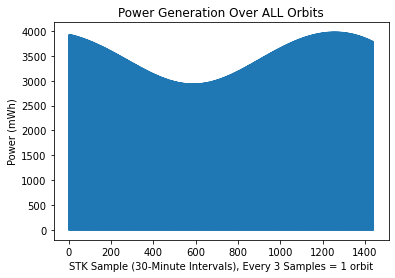

In [21]:
plt.title("Power Generation Over ALL Orbits")
plt.xlabel("STK Sample (30-Minute Intervals), Every 3 Samples = 1 orbit")
plt.ylabel("Power (mWh)")

power_gen, = plt.plot(iterator, solar_power)
#power_used, = plt.plot(iterator, all_comp_data)
#legend = plt.legend((power_gen, power_used), ('Power Generated', 'Power Consumed'))

plt.show()

In [ ]:
Combine all components per every orbit and iterate through all orbits as sun angles change

Solar power at sample 550 with power: 820.4644837721985
Solar power at sample 551 with power: 819.7176474844327
Solar power at sample 552 with power: -2119.872176398553
Solar power at sample 553 with power: 819.2974513306772
Solar power at sample 554 with power: 818.0364277842682
Solar power at sample 555 with power: -2119.872176398553
Solar power at sample 556 with power: 818.1765737345427
Solar power at sample 557 with power: 816.4475441909167
Solar power at sample 558 with power: -2119.872176398553
Solar power at sample 559 with power: 817.0084447323916
Solar power at sample 560 with power: 815.0447293849597
Solar power at sample 561 with power: -2119.872176398553
Solar power at sample 562 with power: 815.8397565896262
Solar power at sample 563 with power: 813.8751023869127
Solar power at sample 564 with power: -2119.872176398553
Solar power at sample 565 with power: 814.6237280239652
Solar power at sample 566 with power: 812.9389986260517
Solar power at sample 567 with power: -2119

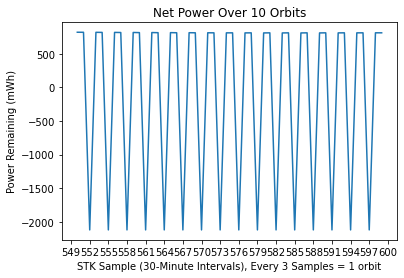

In [38]:
total_power = []
when_power_negative = []
time_without_power = 0 
power_generated = 0

total_power_sample = []
iterator_sample = []

threshold_for_deficit = []
power_per_orbit = 0
net_power_all_orbits = []
orbits_iterator = []
zero = []

for i in range(len(beta_angles)): 
    power_all_comp = solar_power[i] + power_used_transceiver + power_used_platform_computing
    power_generated += power_all_comp
    total_power.append(power_all_comp)
    power_per_orbit += power_all_comp
    
    if i % 3 == 0:
        net_power_all_orbits.append(power_per_orbit)
        power_per_orbit = 0
        orbits_iterator.append(i/3)
        zero.append(0)

for i in range(550, 610):
    total_power_sample.append(total_power[i])
    print("Solar power at sample " + str(i) + " with power: " + str(total_power[i]))
    iterator_sample.append(i)
    
plt.xticks(range(0, len(iterator), 3))
plt.title("Net Power Over 20 Orbits")
plt.xlabel("STK Sample (30-Minute Intervals), Every 3 Samples = 1 orbit")
plt.ylabel("Power Remaining (mWh)")
plt.plot(iterator_sample, total_power_sample)
print("Total energy remaining: " + str(power_generated) + " mWh after conducting: " + str(int(orbits)) + " orbits")
print("Period of analysis: " + str(dates[0]) + " to " + str(dates.iloc[-1]))

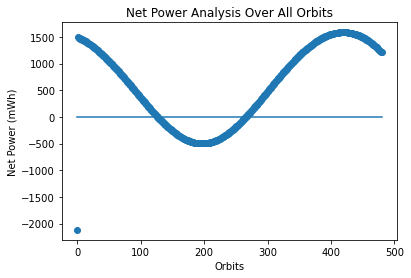

In [40]:
plt.title("Net Power Analysis Over All Orbits")
plt.xlabel("Orbits")
plt.ylabel("Net Power (mWh)")
plt.scatter(orbits_iterator, net_power_all_orbits)
plt.plot(orbits_iterator, zero)

In [ ]:
Evident that in the period from orbit 150 to orbit 275, there is not power generated. That is a result of low beta angle
which is proven by referring to plot shown above of beta angle change with time. It can be proven in data by viewing 
samples in that range: 450 to 825 (remember each orbit = 3 samples, convert orbits 150-275 to samples 450-825).
Shown above the samples in this range, 550 - 610 actually do experience a deficit. 